<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/lab_3/Photosynthesis_ToyModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To create a model that simulates photosynthesis by combining reaction kinetics and statistical modeling based on empirical data, we can break the problem into the following components:

* **Reaction Kinetics Model:** Simulating light-dependent reactions like ATP and NADPH production using Michaelis-Menten kinetics or basic reaction rate laws.
* **Statistical Model:** Using empirical data to model how environmental factors like light intensity, CO₂ concentration, and temperature affect photosynthetic rates.

We'll implement both models and integrate them step-by-step.



**Step 1:** **Define Reaction Kinetics for Light-Dependent Reactions**

We'll simulate a simple light-dependent reaction using Michaelis-Menten kinetics for ATP production. We'll assume that the production rate of ATP depends on light intensity, modeled by:

$$
v = \frac{V_{\text{max}} \cdot [L]}{K_m + [L]}
$$


Where:

* 𝑣 is the rate of ATP production,
* 𝑉max is the maximum rate of ATP production,
* [𝐿] is the light intensity,
* 𝐾𝑚 is the half-saturation constant.

This part will simulate the light-dependent reaction kinetics. You can change the parameters to reflect specific biochemical properties for specific enzymes.

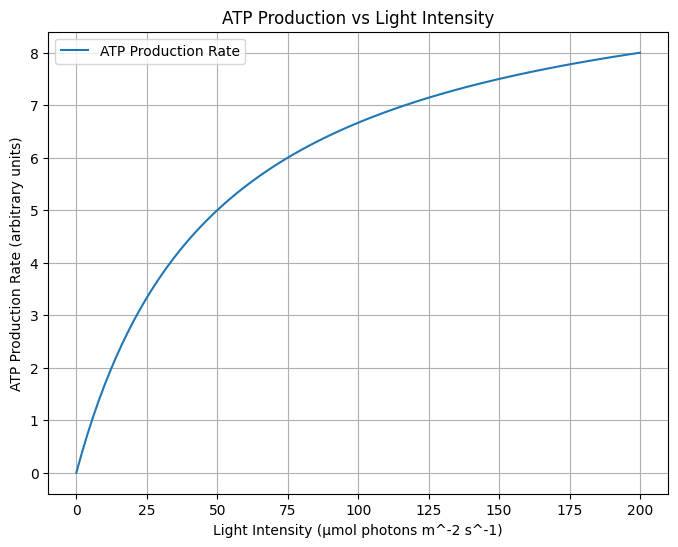

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Michaelis-Menten kinetics function
def atp_production_rate(light_intensity, V_max, K_m):
    return (V_max * light_intensity) / (K_m + light_intensity)

# Parameters for the kinetics model
V_max = 10.0  # Maximum rate of ATP production
K_m = 50.0    # Michaelis constant (light intensity at half-max rate)

# Simulate ATP production for varying light intensities
light_intensities = np.linspace(0, 200, 100)
atp_rates = atp_production_rate(light_intensities, V_max, K_m)

# Plot the ATP production rate vs. light intensity
plt.figure(figsize=(8, 6))
plt.plot(light_intensities, atp_rates, label='ATP Production Rate')
plt.xlabel('Light Intensity (µmol photons m^-2 s^-1)')
plt.ylabel('ATP Production Rate (arbitrary units)')
plt.title('ATP Production vs Light Intensity')
plt.legend()
plt.grid(True)
plt.show()



**Step 2: Define the Statistical Model for Environmental Factors**


We will now create a statistical model that captures how environmental factors such as **light intensity**, **CO₂** **concentration**, and **temperature** affect the **photosynthesis rate**. We will use multiple linear regression based on a synthetic dataset.

For this, we'll assume a simple linear relationship:

$$
P_{\text{rate}} = \beta_0 + \beta_1 \cdot \text{Light} + \beta_2 \cdot \text{CO₂} + \beta_3 \cdot \text{Temperature} + \epsilon
$$

Where $ P_{\text{rate}}$  is the photosynthesis rate, and $ \epsilon $  is the error term.

Below code generates synthetic data for environmental variables and simulates the photosynthesis rate based on these factors. It then fits a linear regression model to predict the photosynthesis rate.

**Realistic Coefficients for the Photosynthesis Statistical Model**

To provide **realistic values** for the coefficients in the statistical model of photosynthesis, we can refer to experimental studies that quantify how environmental factors like **light intensity**, **CO₂ concentration**, and **temperature** affect the rate of photosynthesis in plants. While the specific values can vary depending on the plant species and environmental conditions, I will give a general range based on common crops and plant biology literature.

**1. Light Intensity (µmol photons m⁻² s⁻¹)**
Photosynthesis generally increases with light intensity up to a certain point, after which the effect plateaus (this is known as light saturation). In most plants, light saturation is reached at about 1000-1500 µmol photons m⁻² s⁻¹.

- **Realistic coefficient (β₁) for light intensity**:
  - $ \beta_1 $ could be in the range of **0.005 to 0.02** depending on species and conditions.
  - In practical terms, for every 100 µmol photons m⁻² s⁻¹ increase in light intensity, photosynthesis could increase by **0.5 to 2 units** in a normalized rate scale.


**2. CO₂ Concentration (ppm)**
The concentration of CO₂ directly affects the rate of photosynthesis, especially under conditions where CO₂ is limiting. Typical CO₂ levels in the atmosphere are around 400 ppm, but photosynthesis increases with elevated CO₂ up to around 1000 ppm in many plants.

- **Realistic coefficient (β₂) for CO₂ concentration**:
  - $\beta_2 $ could be in the range of **0.02 to 0.05**.
  - For example, for every 100 ppm increase in CO₂ concentration, the photosynthesis rate may increase by **2 to 5 units** in a normalized scale.

**3. Temperature (°C)**
Temperature affects enzyme activity in the photosynthesis process, particularly the enzymes in the Calvin cycle. Most plants have an optimal temperature range for photosynthesis between **25-30°C**, with significant declines at temperatures higher than **35°C**.

- **Realistic coefficient β₃ for temperature**:
  - $ \beta_3 $ could be in the range of **0.02 to 0.06**.
  - For instance, for every 1°C increase in temperature within the optimal range (up to around 30°C), photosynthesis could increase by **2 to 6 units** on a normalized scale.
  - However, beyond the optimal temperature, photosynthesis rates may decline, so in advanced models, you might want to include a non-linear term for temperature (e.g., a quadratic term).

**Summary of Coefficients for the Photosynthesis Statistical Model**

The general form of the model is:

$$
P_{\text{rate}} = \beta_0 + \beta_1 \cdot \text{Light} + \beta_2 \cdot \text{CO₂} + \beta_3 \cdot \text{Temperature} + \epsilon
$$

Where:
- $ P_{\text{rate}} $ is the photosynthesis rate.
- $ \beta_0 $ (intercept) could be around **0.5 to 1.5**, representing baseline photosynthesis under standard conditions.
- $ \beta_1 $ (light intensity) could range from **0.005 to 0.02**.
- $ \beta_2 $ (CO₂ concentration) could range from **0.02 to 0.05**.
- $ \beta_3 $ (temperature) could range from **0.02 to 0.06**.

**Example Statistical Model with Realistic Coefficients**

$$
P_{\text{rate}} = 1.0 + 0.01 \cdot \text{Light} + 0.03 \cdot \text{CO₂} + 0.04 \cdot \text{Temperature} + \epsilon
$$

- A **light intensity** increase of 100 µmol photons m⁻² s⁻¹ would increase the photosynthetic rate by **1 unit**.
- A **CO₂ concentration** increase of 100 ppm would increase the rate by **3 units**.
- A **temperature** increase of 1°C would increase the rate by **4 units** (within the optimal range).

**Further Considerations**:
1. **Species-Specific Adjustments**: The exact values of these coefficients will vary depending on the plant species (C3 vs C4 plants), their photosynthetic efficiency, and the specific environmental conditions they are exposed to.
   
2. **Non-Linearity in Temperature**: In reality, the relationship between temperature and photosynthesis is non-linear. After a certain temperature (usually around 30-35°C), photosynthesis declines due to enzyme denaturation.

This could be modeled with a quadratic term:

 $$
   P_{\text{rate}} = \beta_0 + \beta_1 \cdot \text{Light} + \beta_2 \cdot \text{CO₂} + \beta_3 \cdot \text{Temperature} + \beta_4 \cdot \text{Temperature}^2 + \epsilon
  $$


 You can modify these values based on specific experimental data for the plant species and environmental conditions of interest.


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data for environmental factors
np.random.seed(42)
n_samples = 100
light = np.random.uniform(50, 200, n_samples)  # Light intensity (µmol photons m^-2 s^-1)
CO2 = np.random.uniform(300, 800, n_samples)   # CO₂ concentration (ppm)
temperature = np.random.uniform(15, 35, n_samples)  # Temperature (°C)

# Simulate photosynthesis rate with some noise
true_coeffs = [1.0, 0.01, 0.03, 0.04]  # [Intercept, Light, CO₂, Temperature]
photosynthesis_rate = (true_coeffs[0] + true_coeffs[1] * light + true_coeffs[2] * CO2 +
                       true_coeffs[3] * temperature + np.random.normal(0, 0.5, n_samples))

# Prepare the data for linear regression
X = np.column_stack((light, CO2, temperature))
y = photosynthesis_rate

# Fit the linear regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Make predictions using the same dataset
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Display model results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")


Model Coefficients: [0.01138643 0.03020855 0.0482337 ]
Model Intercept: 0.5445940340904798
MSE: 0.2321, R²: 0.9881


**Step 3: Integrate Reaction Kinetics and Statistical Models**

We can now integrate the reaction kinetics model and the statistical model by using the ATP production rate as an additional variable in the regression model to predict the overall photosynthesis rate.


1.   First, we'll compute the ATP production rate using the reaction kinetics model.

2.   Then, we'll add it to the existing regression model along with environmental variables (light, CO₂, temperature) to predict photosynthetic rates.


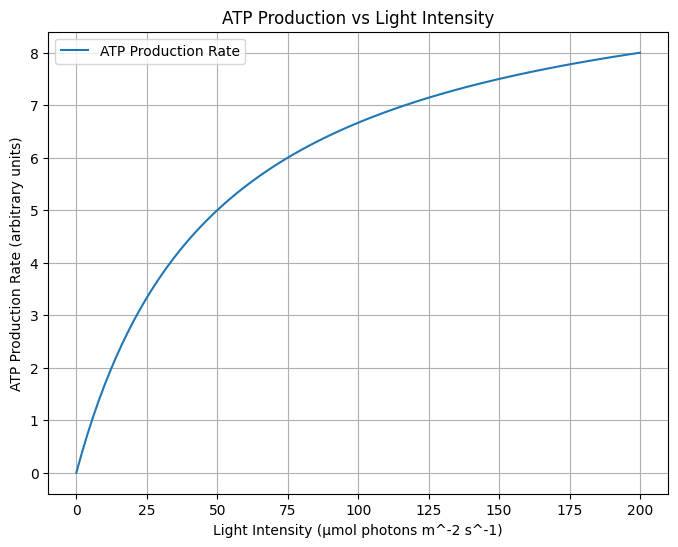

Model Coefficients: [0.01138643 0.03020855 0.0482337 ]
Model Intercept: 0.5445940340904798
MSE: 0.2321, R²: 0.9881

Combined Model with ATP Production
Model Coefficients: [ 0.01142329  0.03020862  0.04823526 -0.00195545]
Model Intercept: 0.5534692603952429
MSE: 0.2321, R²: 0.9881


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define Reaction Kinetics for Light-Dependent Reactions

# Define Michaelis-Menten kinetics function
def atp_production_rate(light_intensity, V_max, K_m):
    return (V_max * light_intensity) / (K_m + light_intensity)

# Parameters for the kinetics model (realistic values)
V_max = 10.0  # Maximum rate of ATP production
K_m = 50.0    # Michaelis constant (light intensity at half-max rate)

# Simulate ATP production for varying light intensities
light_intensities = np.linspace(0, 200, 100)
atp_rates = atp_production_rate(light_intensities, V_max, K_m)

# Plot the ATP production rate vs. light intensity
plt.figure(figsize=(8, 6))
plt.plot(light_intensities, atp_rates, label='ATP Production Rate')
plt.xlabel('Light Intensity (µmol photons m^-2 s^-1)')
plt.ylabel('ATP Production Rate (arbitrary units)')
plt.title('ATP Production vs Light Intensity')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Define the Statistical Model for Environmental Factors

# Generate synthetic data for environmental factors (with realistic ranges)
np.random.seed(42)
n_samples = 100
light = np.random.uniform(50, 200, n_samples)  # Light intensity (µmol photons m^-2 s^-1)
CO2 = np.random.uniform(300, 800, n_samples)   # CO₂ concentration (ppm)
temperature = np.random.uniform(15, 35, n_samples)  # Temperature (°C)

# Realistic coefficients for light, CO₂, and temperature
true_coeffs = [1.0, 0.01, 0.03, 0.04]  # [Intercept, Light, CO₂, Temperature]

# Simulate photosynthesis rate using the true coefficients
photosynthesis_rate = (true_coeffs[0] + true_coeffs[1] * light +
                       true_coeffs[2] * CO2 + true_coeffs[3] * temperature +
                       np.random.normal(0, 0.5, n_samples))

# Prepare the data for linear regression
X = np.column_stack((light, CO2, temperature))
y = photosynthesis_rate

# Fit the linear regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Make predictions using the same dataset
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Display model results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

# Step 3: Integrate Reaction Kinetics and Statistical Models

# Compute ATP production based on light intensity
atp_production = atp_production_rate(light, V_max, K_m)

# Add ATP production as an additional feature to the regression model
X_combined = np.column_stack((light, CO2, temperature, atp_production))

# Fit the combined model
model_combined = LinearRegression()
model_combined.fit(X_combined, y)

# Make predictions with the combined model
y_pred_combined = model_combined.predict(X_combined)

# Evaluate the combined model
mse_combined = mean_squared_error(y, y_pred_combined)
r2_combined = r2_score(y, y_pred_combined)

# Display results for the combined model
print("\nCombined Model with ATP Production")
print("Model Coefficients:", model_combined.coef_)
print("Model Intercept:", model_combined.intercept_)
print(f"MSE: {mse_combined:.4f}, R²: {r2_combined:.4f}")


#### **Adding the ATP production rate does not seem to have any effect- why is that?**

The reason the ATP production rate doesn't appear to have a significant effect in your model is likely due to correlation between the light intensity and ATP production variables. Since ATP production in your reaction kinetics model is entirely driven by light intensity, the two variables are strongly correlated. When you add both light intensity and ATP production as predictors in the regression model, the ATP production rate doesn’t add much new information because light intensity already explains most of the variability in the photosynthesis rate.

This situation is an example of **multicollinearity**, where two or more predictors in a regression model are highly correlated.
This can cause issues such as:

1.   Coefficients being less reliable or interpretable.
2.   One variable "absorbing" the effect of another, so one might not appear significant.




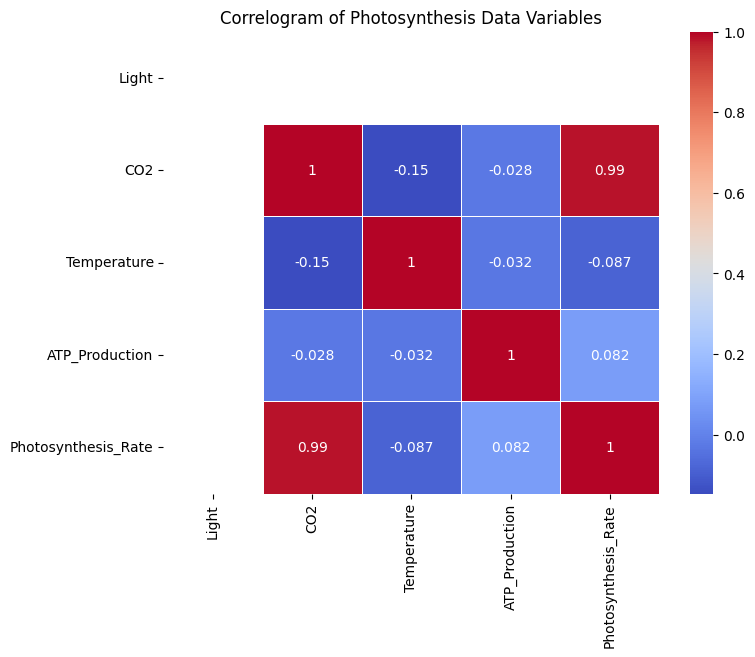

In [26]:
import pandas as pd
import seaborn as sns

# Create a dataframe from the variables
data = {
    'Light': light,
    'CO2': CO2,
    'Temperature': temperature,
    'ATP_Production': atp_production,
    'Photosynthesis_Rate': photosynthesis_rate
}

df = pd.DataFrame(data)

# Create a correlogram using seaborn's heatmap function
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlogram of Photosynthesis Data Variables')
plt.show()



#### **Alternative Approach: Use Non-Linear or Interaction Terms**

In biological systems, some processes, like photosynthesis, involve non-linear relationships between variables. One way to make the ATP production rate more meaningful is by incorporating interaction terms or non-linear models, reflecting how ATP production might influence photosynthesis non-linearly when combined with other environmental factors.

For example, we can try introducing an interaction term between ATP production and light intensity, or use polynomial regression to model potential non-linear effects.

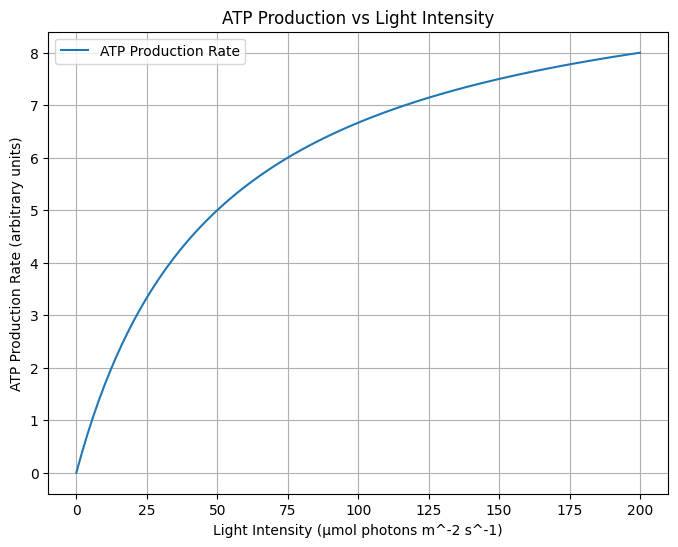

Model Coefficients: [0.01138643 0.03020855 0.0482337 ]
Model Intercept: 0.5445940340904798
MSE: 0.2321, R²: 0.9881

Combined Model with ATP Production
Model Coefficients: [ 0.01142329  0.03020862  0.04823526 -0.00195545]
Model Intercept: 0.5534692603952429
MSE: 0.2321, R²: 0.9881

Model with Interaction Term (Light * ATP Production)
Model Coefficients: [1.06081987e-02 3.02086186e-02 4.82352566e-02 2.12000955e-03
 8.15092374e-05]
Model Intercept: 0.55346926039525
MSE: 0.2321, R²: 0.9881


In [29]:
# Step 1: Define Reaction Kinetics for Light-Dependent Reactions

# Define Michaelis-Menten kinetics function
def atp_production_rate(light_intensity, V_max, K_m):
    return (V_max * light_intensity) / (K_m + light_intensity)

# Parameters for the kinetics model (realistic values)
V_max = 10.0  # Maximum rate of ATP production
K_m = 50.0    # Michaelis constant (light intensity at half-max rate)

# Simulate ATP production for varying light intensities
light_intensities = np.linspace(0, 200, 100)
atp_rates = atp_production_rate(light_intensities, V_max, K_m)

# Step 2: Define the Statistical Model for Environmental Factors

# Generate synthetic data for environmental factors (with realistic ranges)
np.random.seed(42)
n_samples = 100
light = np.random.uniform(50, 200, n_samples)  # Light intensity (µmol photons m^-2 s^-1)
CO2 = np.random.uniform(300, 800, n_samples)   # CO₂ concentration (ppm)
temperature = np.random.uniform(15, 35, n_samples)  # Temperature (°C)

# Realistic coefficients for light, CO₂, and temperature
true_coeffs = [1.0, 0.01, 0.03, 0.04]  # [Intercept, Light, CO₂, Temperature]

# Simulate photosynthesis rate using the true coefficients
photosynthesis_rate = (true_coeffs[0] + true_coeffs[1] * light +
                       true_coeffs[2] * CO2 + true_coeffs[3] * temperature +
                       np.random.normal(0, 0.5, n_samples))

# Prepare the data for linear regression
X = np.column_stack((light, CO2, temperature))
y = photosynthesis_rate

# Fit the linear regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Make predictions using the same dataset
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Display model results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

# Step 3: Integrate Reaction Kinetics and Statistical Models

# Compute ATP production based on light intensity
atp_production = atp_production_rate(light, V_max, K_m)

# Add ATP production as an additional feature to the regression model
X_combined = np.column_stack((light, CO2, temperature, atp_production))

# Fit the combined model
model_combined = LinearRegression()
model_combined.fit(X_combined, y)

# Make predictions with the combined model
y_pred_combined = model_combined.predict(X_combined)

# Evaluate the combined model
mse_combined = mean_squared_error(y, y_pred_combined)
r2_combined = r2_score(y, y_pred_combined)

# Display results for the combined model
print("\nCombined Model with ATP Production")
print("Model Coefficients:", model_combined.coef_)
print("Model Intercept:", model_combined.intercept_)
print(f"MSE: {mse_combined:.4f}, R²: {r2_combined:.4f}")

# Step 4: Adding interaction between light and ATP production
X_interaction = np.column_stack((light, CO2, temperature, atp_production, light * atp_production))

# Fit the model with interaction terms
model_interaction = LinearRegression()
model_interaction.fit(X_interaction, y)

# Predictions and evaluation
y_pred_interaction = model_interaction.predict(X_interaction)
mse_interaction = mean_squared_error(y, y_pred_interaction)
r2_interaction = r2_score(y, y_pred_interaction)

# Display results for the interaction model
print("\nModel with Interaction Term (Light * ATP Production)")
print("Model Coefficients:", model_interaction.coef_)
print("Model Intercept:", model_interaction.intercept_)
print(f"MSE: {mse_interaction:.4f}, R²: {r2_interaction:.4f}")


**Why did the  coefficients change so much in the model that has the interaction term?**

# **Farquhar Photosynthesis Model Summary**

The **Farquhar photosynthesis model**, also known as the **Farquhar, von Caemmerer, and Berry (FvCB) model**, is a mechanistic model that describes photosynthesis in **C3 plants** at the **leaf level**. It focuses on the processes of **carbon fixation** and how these processes are limited by biochemical and environmental factors.

### **Key Features of the Farquhar Model**

#### 1. **Biochemical Basis**:
   - The model simulates photosynthesis by focusing on the enzyme **Rubisco**, which catalyzes the carboxylation (CO₂ fixation) in the Calvin cycle. The model also accounts for the process of **photorespiration**, where Rubisco binds with O₂ instead of CO₂.

#### 2. **Two Limiting Steps**:
   Photosynthesis is limited by two primary processes, and the model takes the minimum of the two:
   
   - **Rubisco-Limited Photosynthesis (Carboxylation)**:
     This is the rate at which CO₂ is fixed by Rubisco, limited by enzyme activity and CO₂ concentration.

     $$
     W_c = \frac{V_{\text{cmax}} \cdot (C_i - \Gamma^*)}{C_i + K_c \cdot \left(1 + \frac{O}{K_o}\right)}
     $$
     
     Where:
     - $ W_c $ is the Rubisco-limited rate,
     - $ V_{\text{cmax}} $ is the maximum Rubisco carboxylation rate,
     - $ C_i $ is the intercellular CO₂ concentration,
     - $ \Gamma^* $ is the CO₂ compensation point.
   
   - **RuBP Regeneration-Limited Photosynthesis (Electron Transport)**:
     This is the rate at which RuBP (Ribulose-1,5-bisphosphate) is regenerated in the Calvin cycle, driven by light and electron transport.
     
     $$
     W_c = \frac{J \cdot (C_i - \Gamma^*)}{4 \cdot \left(C_i + 2 \cdot  \Gamma  \right)}
     $$

     Where:
     - $ W_j $ is the RuBP regeneration-limited rate,
     - $ J $ is the electron transport rate (which depends on light intensity).

#### 3. **Net Photosynthesis**:
   The net photosynthesis rate is determined as the **minimum** of the two limiting rates (carboxylation and RuBP regeneration), minus the **respiration rate** $( R_d $):
   $$
   A = \min(W_c, W_j) - R_d
   $$
   This represents the actual rate of photosynthesis, accounting for both light availability and the biochemical limitations of the Calvin cycle.

#### 4. **Environmental Sensitivity**:
   The model explicitly incorporates the effects of:
   - **CO₂ concentration**: Increasing CO₂ levels typically increase photosynthesis until limited by other factors.
   - **Light intensity**: Influences the electron transport rate and RuBP regeneration.
   - **Oxygen concentration (O₂)**: Affects photorespiration, as O₂ competes with CO₂ for Rubisco activity.
   - **Temperature**: Affects enzyme kinetics (e.g., $ V_{\text{cmax}} $ and $ J $) and thus photosynthesis efficiency.

#### 5. **Photorespiration**:
   The model also accounts for **photorespiration**, where Rubisco fixes O₂ instead of CO₂, leading to a loss of carbon and energy. This process is influenced by the balance of CO₂ and O₂ concentrations.

---

### **Advantages of the Farquhar Model**:
- **Mechanistic Detail**: It provides a detailed, mechanistic representation of photosynthesis, making it particularly useful for understanding leaf-level processes.
- **Environmental Response**: The model accurately predicts how photosynthesis responds to changes in **CO₂**, **light**, **temperature**, and **oxygen**.
- **Widely Used**: It is the foundation of many ecosystem and crop models, especially for studying the effects of **climate change** on plant photosynthesis.

### **Limitations**:
- **Complexity**: The model is computationally intensive, and applying it to large-scale simulations (e.g., crop growth) requires simplifying assumptions.
- **C3 Plants**: It is primarily designed for **C3 plants** and needs modification for C4 or CAM plants.
- **Leaf-Level Focus**: The model focuses on individual leaves and may require scaling to represent canopy-level photosynthesis.

---

### **Summary**:
The **Farquhar model** is a biochemically driven photosynthesis model that captures the core mechanisms of **CO₂ fixation**, **light-driven electron transport**, and **photorespiration** in C3 plants. It explains how photosynthesis is limited by either **Rubisco activity** (carboxylation) or **RuBP regeneration** (electron transport) and how environmental factors like **CO₂ concentration**, **light intensity**, **temperature**, and **oxygen** affect these processes. This model has been fundamental in understanding plant responses to environmental changes and is a key tool in photosynthesis research and ecosystem modeling.

### **Simple Farquhar Model**

Below is a simplified Python implementation of the Farquhar photosynthesis model that calculates the photosynthesis rate given inputs for CO₂ concentration, light intensity, temperature, and oxygen levels.

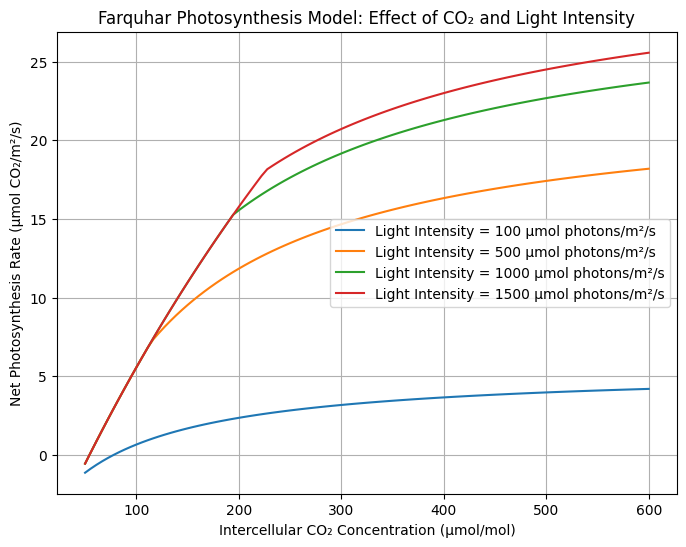

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the Farquhar model
O2_concentration = 210  # O2 concentration in µmol/mol
Gamma_star = 42.75      # CO₂ compensation point in µmol/mol (temperature-dependent)
Kc = 404.9              # Michaelis constant for CO₂ in µmol/mol
Ko = 278.4              # Michaelis constant for O₂ in mmol/mol
Rd = 1.5                # Respiration rate in µmol CO₂/m²/s (constant for simplicity)

# Temperature-dependent values (simplified)
Vcmax = 100  # Maximum carboxylation rate in µmol CO₂/m²/s
Jmax = 150   # Maximum electron transport rate in µmol electrons/m²/s

# Define a function to calculate electron transport rate J based on light intensity
def electron_transport_rate(light_intensity, Jmax):
    # Light-limited electron transport rate
    alpha = 0.3  # Quantum yield of electron transport
    theta = 0.7  # Curvature of the light response curve
    J = (alpha * light_intensity + Jmax - np.sqrt((alpha * light_intensity + Jmax) ** 2 - 4 * theta * alpha * light_intensity * Jmax)) / (2 * theta)
    return J

# Function to calculate Rubisco-limited photosynthesis (Wc)
def rubisco_limited_photosynthesis(Ci, O2, Vcmax, Gamma_star, Kc, Ko):
    return Vcmax * (Ci - Gamma_star) / (Ci + Kc * (1 + O2 / Ko))

# Function to calculate RuBP regeneration-limited photosynthesis (Wj)
def rubp_regen_limited_photosynthesis(Ci, J, Gamma_star):
    return J * (Ci - Gamma_star) / (4 * (Ci + 2 * Gamma_star))

# Function to calculate net photosynthesis rate
def farquhar_photosynthesis(Ci, light_intensity, Vcmax, Jmax, Gamma_star, Kc, Ko, Rd):
    # Rubisco-limited photosynthesis rate
    Wc = rubisco_limited_photosynthesis(Ci, O2_concentration, Vcmax, Gamma_star, Kc, Ko)

    # Electron transport rate based on light intensity
    J = electron_transport_rate(light_intensity, Jmax)

    # RuBP regeneration-limited photosynthesis rate
    Wj = rubp_regen_limited_photosynthesis(Ci, J, Gamma_star)

    # Net photosynthesis rate (minimum of Wc and Wj, minus respiration)
    A = min(Wc, Wj) - Rd
    return A

# Example: Simulating the effect of intercellular CO₂ concentration (Ci) and light intensity on photosynthesis
Ci_values = np.linspace(50, 600, 100)  # Intercellular CO₂ concentration in µmol/mol
light_intensities = [100, 500, 1000, 1500]  # Different light intensities (µmol photons/m²/s)

# Plot photosynthesis rates for different light intensities
plt.figure(figsize=(8, 6))
for light in light_intensities:
    A_values = [farquhar_photosynthesis(Ci, light, Vcmax, Jmax, Gamma_star, Kc, Ko, Rd) for Ci in Ci_values]
    plt.plot(Ci_values, A_values, label=f'Light Intensity = {light} µmol photons/m²/s')

plt.xlabel('Intercellular CO₂ Concentration (µmol/mol)')
plt.ylabel('Net Photosynthesis Rate (µmol CO₂/m²/s)')
plt.title('Farquhar Photosynthesis Model: Effect of CO₂ and Light Intensity')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define the Farquhar Model (Mechanistic Component)
# Constants for the Farquhar model
O2_concentration = 210  # O2 concentration in µmol/mol
Gamma_star = 42.75      # CO₂ compensation point in µmol/mol (temperature-dependent)
Kc = 404.9              # Michaelis constant for CO₂ in µmol/mol
Ko = 278.4              # Michaelis constant for O₂ in mmol/mol
Rd = 1.5                # Respiration rate in µmol CO₂/m²/s (constant for simplicity)

# Temperature-dependent values (simplified)
Vcmax = 100  # Maximum carboxylation rate in µmol CO₂/m²/s
Jmax = 150   # Maximum electron transport rate in µmol electrons/m²/s

# Define a function to calculate electron transport rate J based on light intensity
def electron_transport_rate(light_intensity, Jmax):
    alpha = 0.3  # Quantum yield of electron transport
    theta = 0.7  # Curvature of the light response curve
    J = (alpha * light_intensity + Jmax - np.sqrt((alpha * light_intensity + Jmax) ** 2 - 4 * theta * alpha * light_intensity * Jmax)) / (2 * theta)
    return J

# Function to calculate Rubisco-limited photosynthesis (Wc)
def rubisco_limited_photosynthesis(Ci, O2, Vcmax, Gamma_star, Kc, Ko):
    return Vcmax * (Ci - Gamma_star) / (Ci + Kc * (1 + O2 / Ko))

# Function to calculate RuBP regeneration-limited photosynthesis (Wj)
def rubp_regen_limited_photosynthesis(Ci, J, Gamma_star):
    return J * (Ci - Gamma_star) / (4 * (Ci + 2 * Gamma_star))

# Function to calculate net photosynthesis rate
def farquhar_photosynthesis(Ci, light_intensity, Vcmax, Jmax, Gamma_star, Kc, Ko, Rd):
    # Rubisco-limited photosynthesis rate
    Wc = rubisco_limited_photosynthesis(Ci, O2_concentration, Vcmax, Gamma_star, Kc, Ko)

    # Electron transport rate based on light intensity
    J = electron_transport_rate(light_intensity, Jmax)

    # RuBP regeneration-limited photosynthesis rate
    Wj = rubp_regen_limited_photosynthesis(Ci, J, Gamma_star)

    # Net photosynthesis rate (minimum of Wc and Wj, minus respiration)
    A = min(Wc, Wj) - Rd
    return A

# 2. Generate Empirical Data
np.random.seed(42)
n_samples = 100
light_intensity = np.random.uniform(50, 2000, n_samples)  # Light intensity in µmol photons/m²/s
CO2_concentration = np.random.uniform(200, 600, n_samples)  # Intercellular CO₂ concentration in µmol/mol
temperature = np.random.uniform(10, 35, n_samples)  # Temperature in °C

# Placeholder for photosynthesis rates using the Farquhar model
photosynthesis_rates = []

# Calculate photosynthesis rates using the Farquhar model
for i in range(n_samples):
    A = farquhar_photosynthesis(CO2_concentration[i], light_intensity[i], Vcmax, Jmax, Gamma_star, Kc, Ko, Rd)
    photosynthesis_rates.append(A)

# Convert to numpy array for easier handling
photosynthesis_rates = np.array(photosynthesis_rates)

# 3. Fit a Statistical Model (Multiple Linear Regression)
X = np.column_stack((CO2_concentration, light_intensity, temperature))
y = photosynthesis_rates

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the same data
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Display results
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Coefficients: [ 0.0169378   0.00896453 -0.01381516]
Intercept: 2.726542065316787
MSE: 7.3479
R²: 0.8037


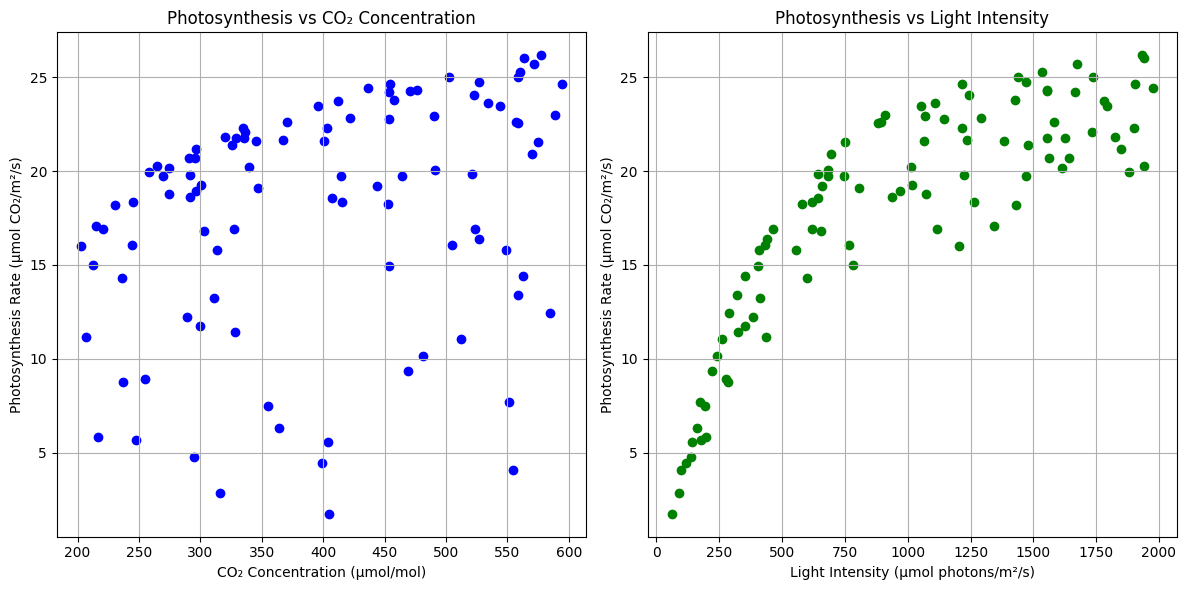

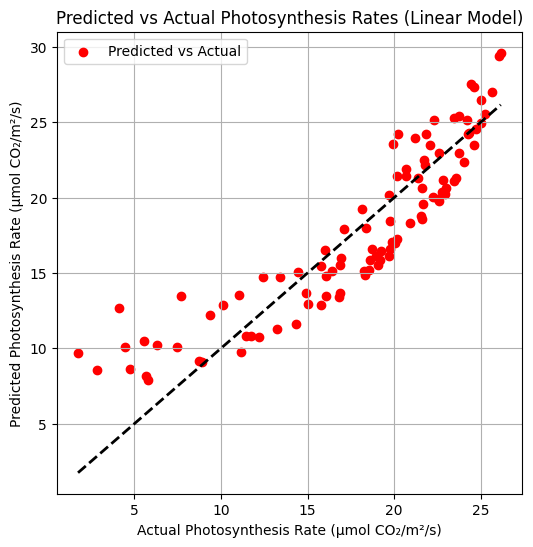

In [32]:
import matplotlib.pyplot as plt

# Plot photosynthesis rates predicted by the Farquhar model vs CO₂ concentration
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(CO2_concentration, photosynthesis_rates, color='blue', label="Farquhar Model Output")
plt.xlabel("CO₂ Concentration (µmol/mol)")
plt.ylabel("Photosynthesis Rate (µmol CO₂/m²/s)")
plt.title("Photosynthesis vs CO₂ Concentration")
plt.grid(True)

# Plot photosynthesis rates predicted by the Farquhar model vs Light intensity
plt.subplot(1, 2, 2)
plt.scatter(light_intensity, photosynthesis_rates, color='green', label="Farquhar Model Output")
plt.xlabel("Light Intensity (µmol photons/m²/s)")
plt.ylabel("Photosynthesis Rate (µmol CO₂/m²/s)")
plt.title("Photosynthesis vs Light Intensity")
plt.grid(True)

plt.tight_layout()
plt.show()

# Now, plot the predicted photosynthesis rates vs actual values using linear regression
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, color='red', label="Predicted vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.xlabel("Actual Photosynthesis Rate (µmol CO₂/m²/s)")
plt.ylabel("Predicted Photosynthesis Rate (µmol CO₂/m²/s)")
plt.title("Predicted vs Actual Photosynthesis Rates (Linear Model)")
plt.grid(True)
plt.legend()
plt.show()


GAM MSE: 0.2204
GAM R²: 0.9941


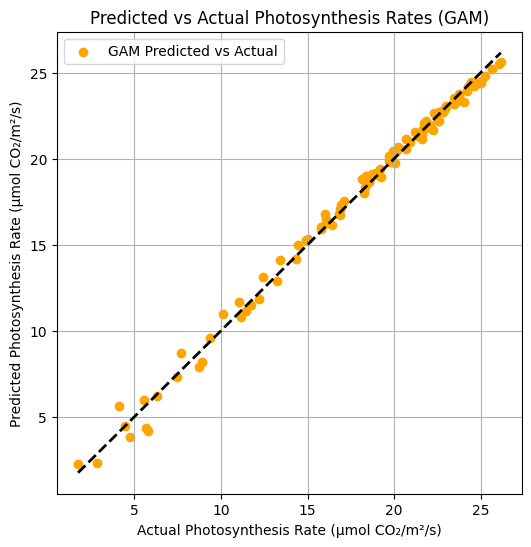

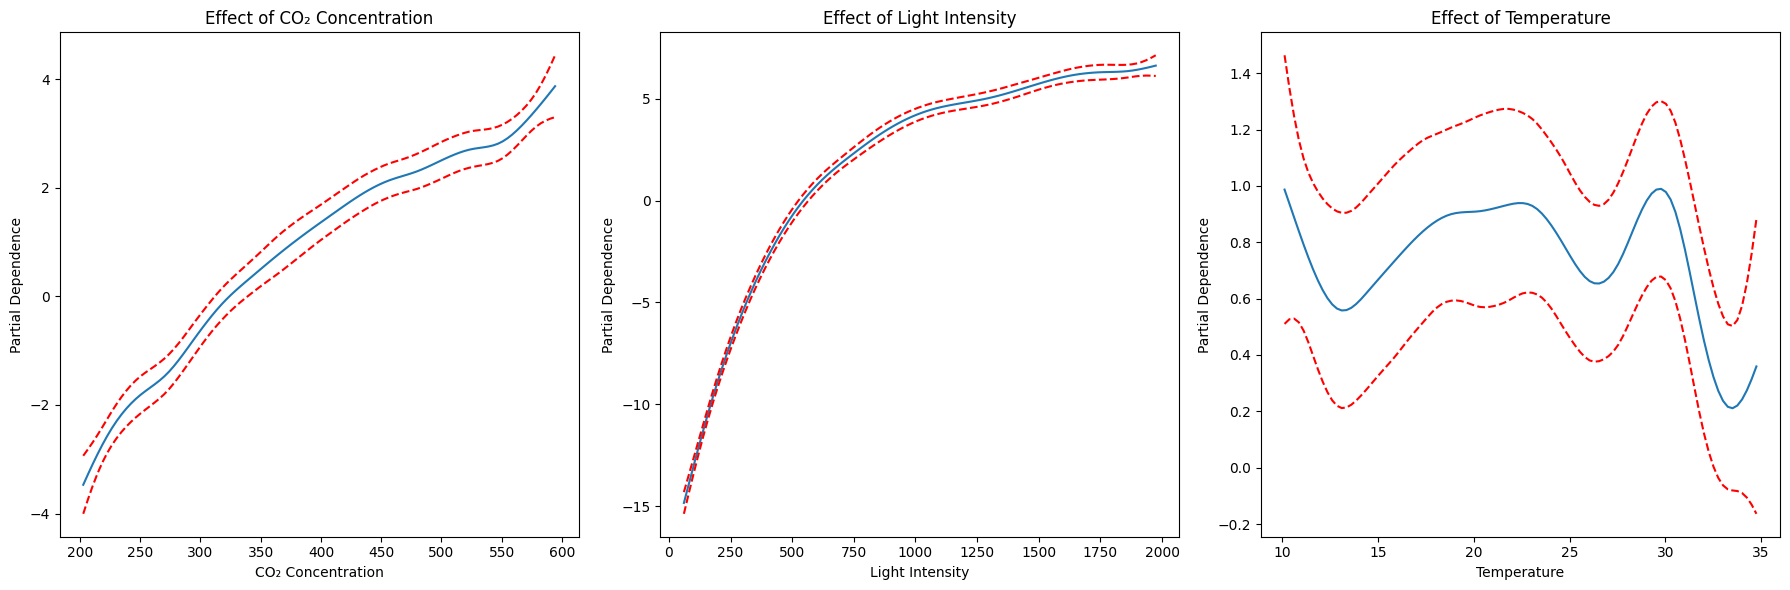

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     26.6067
Link Function:                     IdentityLink Log Likelihood:                                   -93.7937
Number of Samples:                          100 AIC:                                              242.8009
                                                AICc:                                             264.9245
                                                GCV:                                                0.5598
                                                Scale:                                              0.3003
                                                Pseudo R-Squared:                                   0.9941
Feature Function                  Lam

<ipython-input-36-e1c9dc6a9b1b>:48: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




In [36]:
!pip install pygam
import pygam
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Fit a Generalized Additive Model (GAM) using smoothing splines for each predictor
gam = LinearGAM(s(0) + s(1) + s(2))  # s(0) = CO2, s(1) = Light, s(2) = Temperature
gam.fit(X, y)

# Make predictions using the GAM model
y_gam_pred = gam.predict(X)

# Evaluate the GAM model
mse_gam = mean_squared_error(y, y_gam_pred)
r2_gam = r2_score(y, y_gam_pred)

# Display results for the GAM model
print(f"GAM MSE: {mse_gam:.4f}")
print(f"GAM R²: {r2_gam:.4f}")

# Plot the predicted vs actual values for the GAM model
plt.figure(figsize=(6, 6))
plt.scatter(y, y_gam_pred, color='orange', label="GAM Predicted vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.xlabel("Actual Photosynthesis Rate (µmol CO₂/m²/s)")
plt.ylabel("Predicted Photosynthesis Rate (µmol CO₂/m²/s)")
plt.title("Predicted vs Actual Photosynthesis Rates (GAM)")
plt.grid(True)
plt.legend()
plt.show()

# Plot partial dependence plots for each variable
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

titles = ['CO₂ Concentration', 'Light Intensity', 'Temperature']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(f"Effect of {titles[i]}")
    ax.set_xlabel(titles[i])
    ax.set_ylabel("Partial Dependence")

plt.tight_layout()
plt.show()






In [37]:
gam.summary()

# Access the coefficients of the spline basis functions
gam_coef = gam.coef_
print(gam_coef)

# Get the effective degrees of freedom for each term
gam_edis = gam.statistics_['edof_per_coef']
print(gam_edis)

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     26.6067
Link Function:                     IdentityLink Log Likelihood:                                   -93.7937
Number of Samples:                          100 AIC:                                              242.8009
                                                AICc:                                             264.9245
                                                GCV:                                                0.5598
                                                Scale:                                              0.3003
                                                Pseudo R-Squared:                                   0.9941
Feature Function                  Lam

<ipython-input-37-54f34150227c>:1: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




To compare the goodness-of-fit between a Generalized Additive Model (GAM) and a linear model, you can use a few key metrics that quantify how well the models fit the data. Here are the most common metrics to compare:

**1. Mean Squared Error (MSE):**
The Mean Squared Error measures the average of the squared differences between predicted and actual values. A lower MSE indicates a better fit.

**2. R-Squared (R²):**
The R² value (coefficient of determination) measures the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better fits.

**3. Akaike Information Criterion (AIC):**
The AIC is a measure of the relative quality of statistical models for a given dataset. A lower AIC indicates a better fit, while also penalizing more complex models (i.e., models with more parameters). GAMs have this built-in, but for the linear model, you can calculate AIC manually.

**4. Bayesian Information Criterion (BIC):**
Similar to AIC, BIC also penalizes model complexity, but BIC penalizes more strongly than AIC for models with many parameters.

**Comparing the Models:**
After calculating the MSE, R², AIC, and BIC for both the linear model and the GAM, you can compare the values directly.

- Lower MSE and higher R² indicate better predictive accuracy.
- Lower AIC and BIC indicate a better trade-off between model fit and complexity.



In [38]:
from sklearn.metrics import mean_squared_error

# MSE for the linear model
mse_linear = mean_squared_error(y, y_pred)

# MSE for the GAM model
mse_gam = mean_squared_error(y, y_gam_pred)

print(f"Linear Model MSE: {mse_linear:.4f}")
print(f"GAM Model MSE: {mse_gam:.4f}")


Linear Model MSE: 7.3479
GAM Model MSE: 0.2204


In [39]:
from sklearn.metrics import r2_score

# R² for the linear model
r2_linear = r2_score(y, y_pred)

# R² for the GAM model
r2_gam = r2_score(y, y_gam_pred)

print(f"Linear Model R²: {r2_linear:.4f}")
print(f"GAM Model R²: {r2_gam:.4f}")


Linear Model R²: 0.8037
GAM Model R²: 0.9941


In [40]:
import numpy as np

n = len(y)
p = X.shape[1]

# Residual Sum of Squares (RSS) for linear model
rss_linear = np.sum((y - y_pred) ** 2)

# AIC for linear model (penalty term based on p parameters)
aic_linear = n * np.log(rss_linear/n) + 2 * p

# AIC for the GAM model
aic_gam = gam.statistics_['AIC']

print(f"Linear Model AIC: {aic_linear:.4f}")
print(f"GAM Model AIC: {aic_gam:.4f}")

Linear Model AIC: 205.4416
GAM Model AIC: 242.8009


In [41]:
# BIC for linear model
bic_linear = n * np.log(rss_linear/n) + np.log(n) * p
print(f"Linear Model BIC: {bic_linear:.4f}")

# BIC for GAM
bic_gam = gam.statistics_['AIC'] + np.log(n) * gam.statistics_['edof']  # Approximation
print(f"GAM Model BIC: {bic_gam:.4f}")


Linear Model BIC: 213.2571
GAM Model BIC: 365.3295


**What does this mean? Should we use GAM or not?**
